## Automatic Machine Learning with H2O AutoML

---

In [1]:
# Import libraries

import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import dataset

xls = pd.ExcelFile('/Users/mareksturek/Documents/GitHub/various-projects/data/bank_term_deposit.xlsx')

In [3]:
# Tab names

xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [4]:
# Variables for below tabs

client_info =  pd.read_excel(xls, 'CLIENT_INFO')
loan_history =  pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history =  pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history =  pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [5]:
# See client

client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [6]:
# See loan

loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [7]:
# See marketing

marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [8]:
# See subscription

subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [9]:
# Merge and review one dataframe

df = pd.merge(client_info, loan_history, on = ['ID'])
df = pd.merge(df, marketing_history, on = ['ID'])
df = pd.merge(df, subscription_history, on = ['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
# Remove ID column

df = df.drop(['ID'], axis = 1)
df.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
# Start H2o

import h2o 
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.8" 2020-07-14 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.8+10-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.8+10-LTS, mixed mode)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/00/7t34g0sd3lx_rs7y6r11mhc00000gn/T/tmperez6lir
  JVM stdout: /var/folders/00/7t34g0sd3lx_rs7y6r11mhc00000gn/T/tmperez6lir/h2o_mareksturek_started_from_python.out
  JVM stderr: /var/folders/00/7t34g0sd3lx_rs7y6r11mhc00000gn/T/tmperez6lir/h2o_mareksturek_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.2
H2O_cluster_version_age:,2 months and 11 days
H2O_cluster_name:,H2O_from_python_mareksturek_lkbnz2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [15]:
# Parse dataframe df to H2o

h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
# Dataframe summary describe

h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [17]:
# Indepedent variable if not factor

# df[y] = df[y]asfactor()

In [18]:
# Create train, test split 

train, test = h2o_df.split_frame(ratios=[.75])

x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)

In [19]:
# Import H2o AutoML

from h2o.automl import H2OAutoML

In [20]:
# Review dataframe if balanced or not 

df.TERM_DEPOSIT.value_counts()

no     39922
yes     5289
Name: TERM_DEPOSIT, dtype: int64

In [21]:
# Run H2o AutoML for 600 secs = 10 minutes

aml = H2OAutoML(max_runtime_secs = 600,
                balance_classes = True,
                stopping_metric = 'logloss',
                project_name = 'Final',
                seed = 1 ) # exclude_algo=['DeepLearning']

%time aml.train(x=x, y=y, training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 9s, sys: 2.18 s, total: 1min 12s
Wall time: 9min 40s


In [22]:
# H2o AutoML leaderboard 

lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid__1_AutoML_20201115_180849_model_2,0.934623,0.199175,0.62313,0.159831,0.250088,0.0625439
GBM_grid__1_AutoML_20201115_180849_model_3,0.933591,0.20088,0.617757,0.163121,0.251704,0.0633549
GBM_grid__1_AutoML_20201115_180849_model_1,0.931666,0.202244,0.609785,0.173093,0.251991,0.0634997
GBM_grid__1_AutoML_20201115_180849_model_2,0.931591,0.209187,0.613901,0.179258,0.256821,0.0659572
XGBoost_grid__1_AutoML_20201115_180849_model_5,0.93157,0.203054,0.614486,0.167437,0.251195,0.0630988
XGBoost_grid__1_AutoML_20201115_180849_model_1,0.93026,0.205373,0.60802,0.167145,0.253725,0.0643762
StackedEnsemble_AllModels_AutoML_20201115_180849,0.930121,0.210929,0.621299,0.181765,0.253053,0.0640358
GBM_2_AutoML_20201115_180849,0.929326,0.215732,0.604905,0.160131,0.260869,0.0680526
StackedEnsemble_BestOfFamily_AutoML_20201115_180849,0.928992,0.212289,0.620864,0.172452,0.25365,0.0643381
XGBoost_3_AutoML_20201115_180849,0.928846,0.206256,0.608338,0.173235,0.253069,0.0640441


In [25]:
# Show the leader 

se = aml.leader
# metalearner = h2o.get_model(se.metalearner()['name'])
# metalearner.varimp()

In [26]:
# Base Learner XGBoost model 

model = h2o.get_model('XGBoost_grid__1_AutoML_20201115_180849_model_2')

In [27]:
# Use XGBoost model on test set

model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.0617833707206211
RMSE: 0.24856260925694576
LogLoss: 0.1961918193310392
Mean Per-Class Error: 0.1307090998201681
AUC: 0.934046897132767
AUCPR: 0.6303824940672357
Gini: 0.868093794265534

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27930233379205066: 


,,no,yes,Error,Rate
0,no,9124.0,799.0,0.0805,(799.0/9923.0)
1,yes,340.0,948.0,0.264,(340.0/1288.0)
2,Total,9464.0,1747.0,0.1016,(1139.0/11211.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.279302,0.624712,215.0
1,max f2,0.151940,0.731949,271.0
2,max f0point5,0.420993,0.601088,163.0
3,max accuracy,0.569371,0.909999,115.0
4,max precision,0.989315,1.000000,0.0
5,max recall,0.002559,1.000000,393.0
6,max specificity,0.989315,1.000000,0.0
7,max absolute_mcc,0.217655,0.581175,240.0
8,max min_per_class_accuracy,0.143555,0.863247,275.0
9,max mean_per_class_accuracy,0.091109,0.869291,303.0



Gains/Lift Table: Avg response rate: 11.49 %, avg score: 11.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010079,0.878563,7.471741,7.471741,0.858407,0.920458,0.858407,0.920458,0.075311,0.075311,647.174050,647.174050,0.073698
1,2,0.020070,0.810270,6.605860,7.040725,0.758929,0.844758,0.808889,0.882776,0.065994,0.141304,560.586041,604.072464,0.136971
2,3,0.030060,0.746639,6.061848,6.715401,0.696429,0.777524,0.771513,0.847796,0.060559,0.201863,506.184838,571.540078,0.194104
3,4,0.040050,0.697847,5.595552,6.436062,0.642857,0.721975,0.739421,0.816411,0.055901,0.257764,459.555235,543.606219,0.245973
4,5,0.050040,0.646536,5.051540,6.159651,0.580357,0.670987,0.707665,0.787378,0.050466,0.308230,405.154032,515.965141,0.291703
5,6,0.100080,0.441622,4.546040,5.352846,0.522282,0.540895,0.614973,0.664136,0.227484,0.535714,354.603996,435.284568,0.492179
6,7,0.150031,0.293722,3.652652,4.786788,0.419643,0.363259,0.549941,0.563963,0.182453,0.718168,265.265223,378.678841,0.641880
7,8,0.200071,0.175690,2.311809,4.167768,0.265597,0.231738,0.478823,0.480870,0.115683,0.833851,131.180872,316.776763,0.716044
8,9,0.300062,0.064046,1.110347,3.148931,0.127565,0.108586,0.361772,0.356812,0.111025,0.944876,11.034749,214.893054,0.728510
9,10,0.400054,0.029151,0.341645,2.447266,0.039251,0.043416,0.281159,0.278480,0.034161,0.979037,-65.835462,144.726573,0.654136


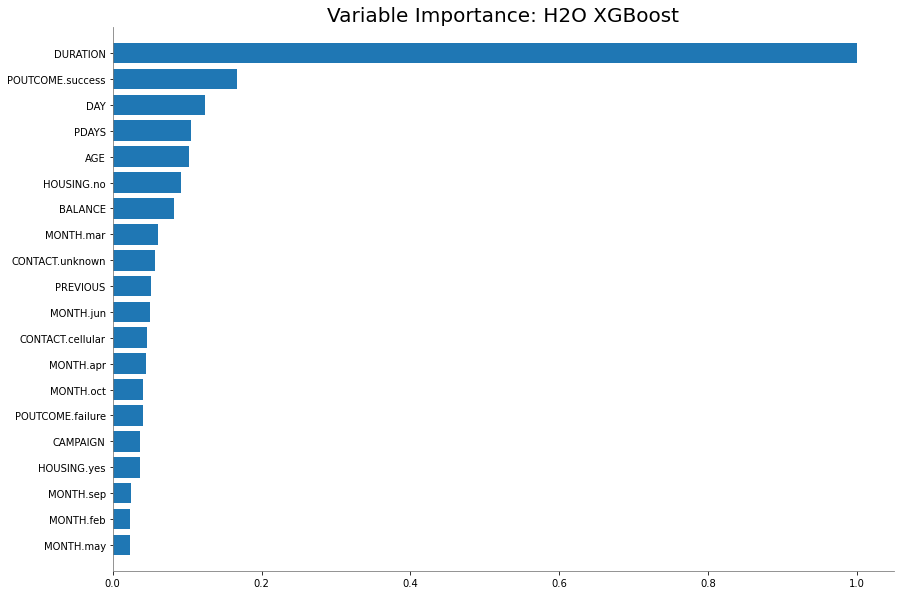

In [28]:
# Show variable importance

model.varimp_plot(num_of_features=20)